# Cluster sectors

Goal: explore whether sectors can be clustered into separate groups, by exploring the needs that households exhibit. In other words, we are interested to see whether households show needs in clusters of sectors. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load datasets

In [2]:
severity = pd.read_csv('../data/processed/severity.csv')
severity = severity.drop(['Unnamed: 0', '_uuid'], axis=1)
features = severity.columns.values

### 1) PCA on the features

In [3]:
X = severity.astype(np.float64).values  #(10378, 8)
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X) #PCA(n_components=3).fit_transform(X)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

([<matplotlib.axis.XTick at 0x7f85101fdb70>,
 <a list of 8 Text xticklabel objects>)

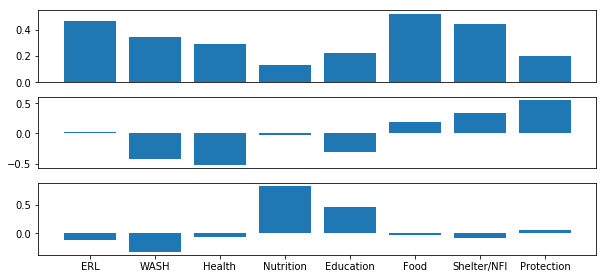

In [11]:
# Plot sector weight in first n_pcs
n_pcs = 3
plt.figure(figsize=(10,1.5*n_pcs))
for i in range(n_pcs):
    plt.subplot(n_pcs,1,i+1)
    plt.bar(range(8),eigenvectors[i])
    plt.xticks([])
plt.xticks(range(8),features)

### 2) Feature agglomeration

In [12]:
from sklearn import cluster
n_clusters = 4
agglo = cluster.FeatureAgglomeration(n_clusters=n_clusters)
agglo.fit(X)
X_reduced = agglo.transform(X)
labels = agglo.fit(X).labels_
X_reduced.shape

(10378, 4)

In [13]:
for i in range(n_clusters):
    idx = np.where(labels==i)
    print(features[idx])

['Nutrition' 'Education']
['ERL' 'Food' 'Shelter/NFI']
['WASH' 'Health']
['Protection']
